In [5]:
pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 27kB/s 
     |████████████████████████████████| 3.8MB 29.5MB/s 
     |████████████████████████████████| 512kB 38.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=d4018e0d4bf17e5ea2abe5e23cfab00af0986307ba77364310358733d81aee85
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

In [6]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk #serialización de grafos inferenciales

!pip install -q Cython contextlib2 pillow lxml matplotlib  #librerias para visualizar imagenes

!pip install -q pycocotools  #para trabajar con unas herramientas de http://cocodataset.org/

!pip install -q watermark   #imprimir marcas de fecha y hora, números de versión e información de hardware.

Selecting previously unselected package python-bs4.
(Reading database ... 144467 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [3]:
!python3 --version
%load_ext watermark
print("--Computer vision(hardware)--")
%watermark
%watermark -a "--Computer vision(libraries)--" -u -d -v -p numpy,tensorflow,pycocotools

Python 3.6.9
--Computer vision(hardware)--
2020-06-04T12:26:30+00:00

CPython 3.6.9
IPython 5.5.0

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.104+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
--Computer vision(libraries)-- 
last updated: 2020-06-04 

CPython 3.6.9
IPython 5.5.0

numpy 1.18.4
tensorflow 2.2.0
pycocotools 2.0.0


In [9]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU NO esta activa para el entorno')
tf.__version__

GPU NO esta activa para el entorno


'1.15.0'

In [7]:
pip install tf_slim


     |████████████████████████████████| 358kB 2.8MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


EJECUTAR UNA VEZ

Ejecutar repo de tensorflow

In [7]:
#descargamos el repositorio de object_detection que esta en GITHUB
%cd /content/gdrive/My\ Drive/deteccion_objectos

!git clone --quiet https://github.com/tensorflow/models.git

%cd /content/gdrive/My\ Drive/deteccion_objectos/models/research
!protoc object_detection/protos/*.proto --python_out=.
#cambiamos la variable de entorno para que sea ahora la del repositorio clonado
import os
os.environ['PYTHONPATH'] += ':/content/gdrive/My Drive/deteccion_objectos/models/research/:/content/gdrive/My Drive/deteccion_objectos/models/research/slim/'
!echo $PYTHONPATH
%cd /content/gdrive/My\ Drive/deteccion_objectos/models/research
#compilar protos (generar los archivos .py que van en la carpeta protos/)
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/My Drive/deteccion_objectos
/content/gdrive/My Drive/deteccion_objectos/models/research
object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.
/env/python:/content/gdrive/My Drive/deteccion_objectos/models/research/:/content/gdrive/My Drive/deteccion_objectos/models/research/slim/
/content/gdrive/My Drive/deteccion_objectos/models/research
object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


In [13]:
# Convierte los archivos xml que estan en la carpeta de entrenamiento a una lista CSV 
# y genera el archivo label_map.pbtxt en el directorio configuracion
!python  /content/gdrive/My\ Drive/deteccion_objectos/xml_a_csv_v2.py \
 --inputDir  /content/gdrive/My\ Drive/deteccion_objectos/img_entrenamiento \
 --outputFile  /content/gdrive/My\ Drive/deteccion_objectos/csv/train_labels.csv \
 --labelMapDir  /content/gdrive/My\ Drive/deteccion_objectos/configuracion

Successfully converted xml to csv.
Generate `/content/gdrive/My Drive/deteccion_objectos/configuracion/label_map.pbtxt`


In [14]:
# Convierte los archivos xml que estan en la carpeta de test a una lista CSV
!python /content/gdrive/My\ Drive/deteccion_objectos/xml_a_csv_v2.py \
--inputDir /content/gdrive/My\ Drive/deteccion_objectos/img_test \
--outputFile /content/gdrive/My\ Drive/deteccion_objectos/csv/test_labels.csv

Successfully converted xml to csv.


In [40]:
# Generando el archivo  train.record
!python /content/gdrive/My\ Drive/deteccion_objectos/csv_a_tf_v2.py \
--csv_input=/content/gdrive/My\ Drive/deteccion_objectos/csv/train_labels.csv \
--output_path=/content/gdrive/My\ Drive/deteccion_objectos/TFRecords/train.record \
--img_path=/content/gdrive/My\ Drive/deteccion_objectos/img_entrenamiento \
--label_map /content/gdrive/My\ Drive/deteccion_objectos/configuracion/label_map.pbtxt



W0604 14:10:06.956171 140178888206208 module_wrapper.py:139] From /content/gdrive/My Drive/deteccion_objectos/csv_a_tf_v2.py:105: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0604 14:10:07.016774 140178888206208 module_wrapper.py:139] From /content/gdrive/My Drive/deteccion_objectos/csv_a_tf_v2.py:51: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/gdrive/My Drive/deteccion_objectos/TFRecords/train.record


In [30]:
# Generando el archivo  test.record
!python /content/gdrive/My\ Drive/deteccion_objectos/csv_a_tf_v2.py \
--csv_input=/content/gdrive/My\ Drive/deteccion_objectos/csv/test_labels.csv \
--output_path=/content/gdrive/My\ Drive/deteccion_objectos/TFRecords/test.record \
--img_path=/content/gdrive/My\ Drive/deteccion_objectos/img_test \
--label_map /content/gdrive/My\ Drive/deteccion_objectos/configuracion/label_map.pbtxt



W0604 13:49:24.067075 139734880622464 module_wrapper.py:139] From /content/gdrive/My Drive/deteccion_objectos/csv_a_tf_v2.py:105: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0604 13:49:24.127485 139734880622464 module_wrapper.py:139] From /content/gdrive/My Drive/deteccion_objectos/csv_a_tf_v2.py:51: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/gdrive/My Drive/deteccion_objectos/TFRecords/test.record


descargar el grafo inferencial preentrenado

In [21]:
#variables con las rutas de nuestras dataset de entrenamiento
test_record_fname     = '/content/gdrive/My Drive/deteccion_objectos/TFRecords/test.record'
train_record_fname    = '/content/gdrive/My Drive/deteccion_objectos/TFRecords/train.record'
label_map_pbtxt_fname = '/content/gdrive/My Drive/deteccion_objectos/configuracion/label_map.pbtxt'

# número de pasos (epochs) que usaremos para entrenar
num_steps = 2000  # 200000

# número de evaluaciones por pasos (cada 50 pasos evaluamos el modelo).
num_eval_steps = 50

# Selecionamos el archivo de configuración del modelo
selected_model = 'ssd_mobilenet_v2'

MODELS_CONFIG = {
       'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 12
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
        'batch_size': 8
    
}
}
#variables con las rutas de nuestras dataset de entrenamiento
test_record_fname = '/content/gdrive/My Drive/deteccion_objetos/TFRecords/test.record'
train_record_fname = '/content/gdrive/My Drive/deteccion_objetos/TFRecords/train.record'
label_map_pbtxt_fname = '/content/gdrive/My Drive/deteccion_objetos/configuracion/label_map.pbtxt'


# definimos el tamaño del lote de entrenamiento para uso en la memoria de 
# la GPU Tesla K80 de Colaborate para el modelo seleccionado.
batch_size = MODELS_CONFIG[selected_model]['batch_size']

# Nombre del modelo de detección de objectos que usaremos
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Nombre del archivo de canalización en la API de detección de objetos de tensorflow.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

pipeline_fname = os.path.join('/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/samples/configs/', pipeline_file)
print("pipeline_fname:"+pipeline_fname)

pipeline_fname:/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config


In [11]:
# ubicación de la carpeta base
%cd /content/gdrive/My\ Drive/deteccion_objectos/models/research

import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# ubicación donde guardaremos el grafo preentrenado que descargamos
DEST_DIR = '/content/gdrive/My Drive/deteccion_objectos/models/research/pretrained_model'

if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
  shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

# listamos los archivos descargados
!echo $DEST_DIR
!ls -alh pretrained_model

/content/gdrive/My Drive/deteccion_objectos/models/research
/content/gdrive/My Drive/deteccion_objectos/models/research/pretrained_model
total 135M
-rw------- 1 root root   77 Mar 30  2018 checkpoint
-rw------- 1 root root  67M Mar 30  2018 frozen_inference_graph.pb
-rw------- 1 root root  65M Mar 30  2018 model.ckpt.data-00000-of-00001
-rw------- 1 root root  15K Mar 30  2018 model.ckpt.index
-rw------- 1 root root 3.4M Mar 30  2018 model.ckpt.meta
-rw------- 1 root root 4.2K Mar 30  2018 pipeline.config
drwx------ 3 root root 4.0K Mar 30  2018 saved_model


modificando archivo de configuracion

In [12]:
# Nombre del archivo de canalización en la API de detección de objetos de tensorflow.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

pipeline_fname = os.path.join('/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/samples/configs/', pipeline_file)
print("pipeline_fname:"+pipeline_fname)

fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint
%cd /content/gdrive/My\ Drive/deteccion_objectos/models/research

pipeline_fname:/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config
/content/gdrive/My Drive/deteccion_objectos/models/research


configurar la canalización en la API de detección de objetos de tensorflow)

In [0]:
import os

assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

modificando archivo de conf del grafo con parametros personalizadosde nuestro proyecto

In [14]:
import re

num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # punto de control de inicio
    s = re.sub('fine_tune_checkpoint: ".*?"','fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # ubicación de los tfrecords de train y test
    s = re.sub('(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub('(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # ubicación del labelmap.pbtxt
    s = re.sub('label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Establecemos el tamaño del lote de entrenamiento
    s = re.sub('batch_size: [0-9]+','batch_size: {}'.format(batch_size), s)

    # Establecemos la cantidad de pasos de entrenamiento
    s = re.sub('num_steps: [0-9]+','num_steps: {}'.format(num_steps), s)
    
    # establecemos el número de clases (etiquetas)
    s = re.sub('num_classes: [0-9]+','num_classes: {}'.format(num_classes), s)
    f.write(s)

NotFoundError: ignored

In [15]:
print(pipeline_fname)
!cat pipeline_fname
!cat /content/gdrive/My\ Drive/deteccion_objectos/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config


/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config
cat: pipeline_fname: No such file or directory
# SSD with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 3
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator 

In [0]:
model_dir = '/content/gdrive/My Drive/deteccion_objectos/models/research/training/'

Entreno y reentreno

parametros para entrenamiento

In [0]:
import os
os.environ['PYTHONPATH'] = '/env/python:/content/gdrive/My Drive/deteccion_objectos/models/research/:/content/gdrive/My Drive/deteccion_objectos/models/research/slim/'
#os.environ['PYTHONPATH'] =   '/content/gdrive/My Drive/deteccion_objectos/models/research'
#os.environ['PYTHONPATH'] += ':/content/gdrive/My Drive/deteccion_objectos/models/research/slim'
#os.environ['PYTHONPATH'] += ':/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/protos'

In [26]:
!echo $PYTHONPATH

/env/python:/content/gdrive/My Drive/deteccion_objectos/models/research/:/content/gdrive/My Drive/deteccion_objectos/models/research/slim/


In [32]:
#variables con las rutas de nuestras dataset de entrenamiento
test_record_fname     = '/content/gdrive/My Drive/deteccion_objectos/TFRecords/test.record'
train_record_fname    = '/content/gdrive/My Drive/deteccion_objectos/TFRecords/train.record'
label_map_pbtxt_fname = '/content/gdrive/My Drive/deteccion_objectos/configuracion/label_map.pbtxt'

# número de pasos (epochs) que usaremos para entrenar
num_steps = 2000  # 200000

# número de evaluaciones por pasos (cada 50 pasos evaluamos el modelo).
num_eval_steps = 50

# Selecionamos el archivo de configuración del modelo
selected_model = 'ssd_mobilenet_v2'

MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 12
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
        'batch_size': 8
    }
}

# definimos el tamaño del lote de entrenamiento para uso en la memoria de 
# la GPU Tesla K80 de Colaborate para el modelo seleccionado.
batch_size = MODELS_CONFIG[selected_model]['batch_size']

# Nombre del modelo de detección de objectos que usaremos
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Nombre del archivo de canalización en la API de detección de objetos de tensorflow.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

pipeline_fname = os.path.join('/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/samples/configs/', pipeline_file)
print("pipeline_fname:"+pipeline_fname)

model_dir = '/content/gdrive/My Drive/deteccion_objectos/models/research/training/'

pipeline_fname:/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config


crear carpeta necesaria para entrenar


In [33]:
# Recuerden este codigo se hace una sola vez (de lo contrario perderan el entrenamiento)
# la carpeta se debe crear en /content/gdrive/My Drive/deteccion_objectos/models/research/
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)
print(model_dir)

/content/gdrive/My Drive/deteccion_objectos/models/research/training/


habilitar tensorboard

In [34]:
#descargar y descomprimir el servidor de tensorboard
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2020-06-04 13:55:09--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.208.57.0, 107.23.162.152, 3.90.94.177, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.208.57.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  5.93MB/s    in 2.2s    

2020-06-04 13:55:12 (5.93 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = model_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format('/content/gdrive/My Drive/deteccion_objectos/models/research/training/')
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [37]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://39c707bc387f.ngrok.io


comienzo de entreno

In [23]:
#aca podemos revisar algunos de los parametros que vamos a tener presente para entrenar
print ("---archivos necesarios para el entremiento---\n")
print("pipeline_fname: "+pipeline_fname)
print("model_dir: "+model_dir)
print("\n---parametros para el entrenamiento---")
print("num_steps: "+str(num_steps))
print("num_eval_steps: "+str(num_eval_steps))

---archivos necesarios para el entremiento---

pipeline_fname: /content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config
model_dir: /content/gdrive/My Drive/deteccion_objectos/models/research/training/

---parametros para el entrenamiento---
num_steps: 2000
num_eval_steps: 50


opcion 1 entreno

In [44]:
!python /content/gdrive/My\ Drive/deteccion_objectos/models/research/object_detection/model_main.py \
    --pipeline_config_path /content/gdrive/My\ Drive/deteccion_objectos/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config \
    --model_dir  /content/gdrive/My\ Drive/deteccion_objectos/models/research/training/ \
    --alsologtostderr \
    --num_train_steps 10000 \
    --num_eval_steps 50

W0605 16:18:07.386876 140148187322240 model_lib.py:717] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 10000
I0605 16:18:07.387242 140148187322240 config_util.py:523] Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0605 16:18:07.387406 140148187322240 config_util.py:523] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0605 16:18:07.387579 140148187322240 config_util.py:523] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0605 16:18:07.387724 140148187322240 config_util.py:523] Maybe overwriting eval_num_epochs: 1
INFO:tensorflow:Maybe overwriting load_pretrained: True
I0605 16:18:07.387982 140148187322240 config_util.py:523] Maybe overwriting load_pretrained: True
INFO:tensorflow:Ignoring config override key: load_pretrained
I0605 16:18:07.388216 140148187322240 config_util.py

congelando grafo inferencial

In [0]:
#eliminamos la carpeta donde se guarda el grafo inferencial congelado
import shutil
shutil.rmtree('/content/gdrive/My Drive/deteccion_objectos/models/research/fine_tuned_model')

In [46]:
#generamos el nombre el ultimo checkpoint valido de entrenamiento
import os
import re
import numpy as np

%cd /content/gdrive/My\ Drive/deteccion_objectos/models/research
os.environ['PYTHONPATH'] = '/env/python:/content/gdrive/My Drive/deteccion_objectos/models/research/:/content/gdrive/My Drive/deteccion_objectos/models/research/slim/'
model_dir='/content/gdrive/My Drive/deteccion_objectos/models/research/training'
output_directory = '/content/gdrive/My Drive/deteccion_objectos/models/research/fine_tuned_model'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)

/content/gdrive/My Drive/deteccion_objectos/models/research
/content/gdrive/My Drive/deteccion_objectos/models/research/training/model.ckpt-7864


In [49]:
#generamos el grafo inferencias congelado
!python /content/gdrive/My\ Drive/deteccion_objectos/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path='/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config' \
    --output_directory='/content/gdrive/My Drive/deteccion_objectos/models/research/fine_tuned_model' \
    --trained_checkpoint_prefix='/content/gdrive/My Drive/deteccion_objectos/models/research/training/model.ckpt-7864'

Instructions for updating:
Please use `layer.__call__` method instead.
W0605 16:40:36.916539 140093199075200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0605 16:40:39.895426 140093199075200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0605 16:40:39.948983 140093199075200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0605 16:40:40.136106 140093199075200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

probando grafo de inferencia


In [50]:
import os
import glob

# Ruta del gráfo de detección congelado. Este es el modelo real que se utiliza para la detección de objetos.
PATH_TO_CKPT = '/content/gdrive/My Drive/deteccion_objectos/models/research/fine_tuned_model/frozen_inference_graph.pb'

# Lista de las cadenas que se utilizan para agregar la etiqueta correcta para cada cuadro.
PATH_TO_LABELS = "/content/gdrive/My Drive/deteccion_objectos/configuracion/label_map.pbtxt"

# ruta donde estan las imágenes para probar
PATH_TO_TEST_IMAGES_DIR =  "/content/gdrive/My Drive/deteccion_objectos/img_prueba"
pb_fname='/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config'
assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

#número de clases a las que se liminara el grafo.
num_classes = 3

['/content/gdrive/My Drive/deteccion_objectos/img_prueba/elfp1.jpg', '/content/gdrive/My Drive/deteccion_objectos/img_prueba/elfp.jpg', '/content/gdrive/My Drive/deteccion_objectos/img_prueba/jirp1.jpg', '/content/gdrive/My Drive/deteccion_objectos/img_prueba/jirp2.jpg', '/content/gdrive/My Drive/deteccion_objectos/img_prueba/perp1.jpg', '/content/gdrive/My Drive/deteccion_objectos/img_prueba/perp2.jpg']


/content/gdrive/My Drive/deteccion_objectos/models/research/object_detection
/content/gdrive/My Drive/deteccion_objectos/img_prueba/elfp1.jpg
/content/gdrive/My Drive/deteccion_objectos/img_prueba/elfp.jpg
/content/gdrive/My Drive/deteccion_objectos/img_prueba/jirp1.jpg
/content/gdrive/My Drive/deteccion_objectos/img_prueba/jirp2.jpg
/content/gdrive/My Drive/deteccion_objectos/img_prueba/perp1.jpg
/content/gdrive/My Drive/deteccion_objectos/img_prueba/perp2.jpg


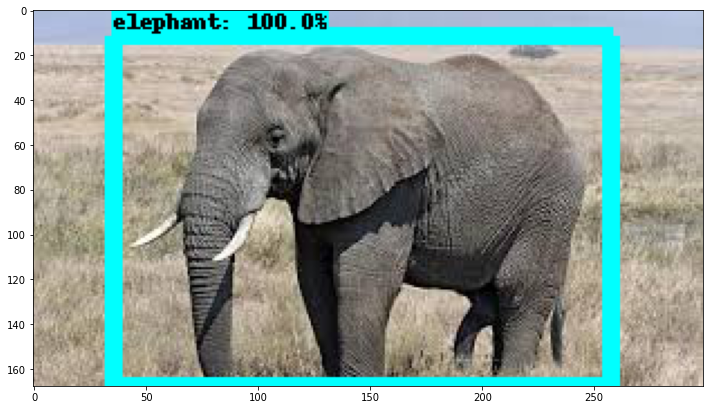

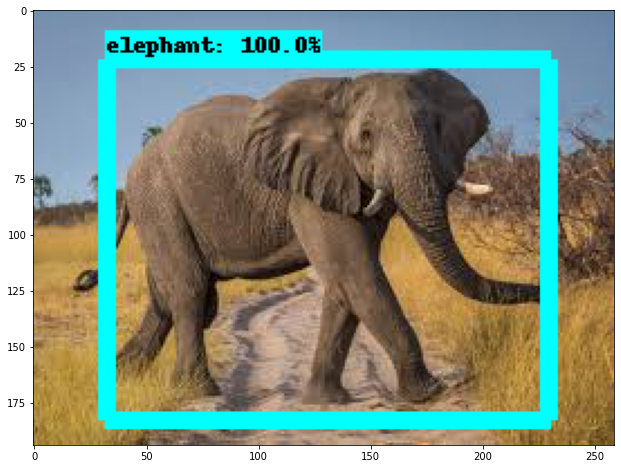

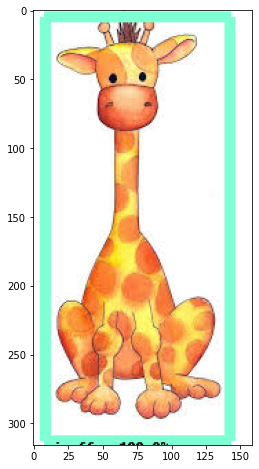

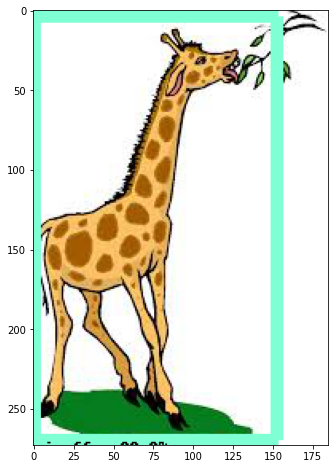

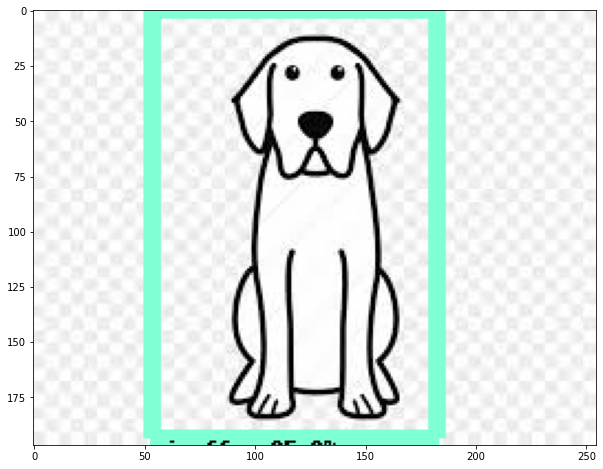

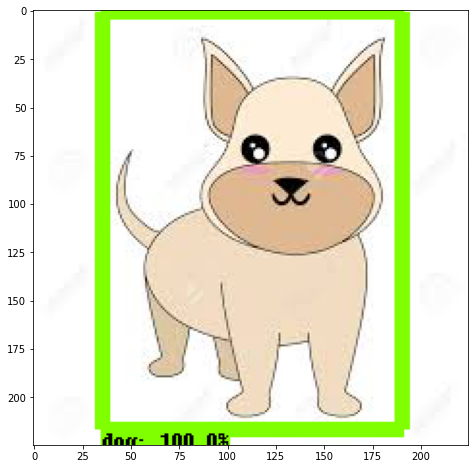

In [52]:
%cd /content/gdrive/My\ Drive/deteccion_objectos/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

sys.path.append("..")
from object_detection.utils import ops as utils_ops

#Esto es necesario para mostrar las imágenes.
%matplotlib inline

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

#funcion para analizar inferencia en una imagen
def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Obtenga manijas para tensores de entrada y salida
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # El siguiente procesamiento es solo para una sola imagen
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Es necesario volver a enmarcar para traducir la máscara de las coordenadas del cuadro a las coordenadas de la imagen y ajustar el tamaño de la imagen.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Siga la convención agregando nuevamente la dimensión del lote
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,feed_dict={image_tensor: np.expand_dims(image, 0)})

            # todas las salidas son matrices numpy float32, así que convierta los tipos según corresponda
            output_dict['num_detections'] = int(output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
  print(image_path)
  image = Image.open(image_path)
  # la representación basada en matriz de la imagen se usará más adelante para preparar la imagen resultante con cuadros y etiquetas.
  image_np = load_image_into_numpy_array(image)
  # Amplíe las dimensiones ya que el modelo espera que las imágenes tengan forma: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # deteción actual
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualización de los resultados de una detección.
  vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks'),
    use_normalized_coordinates=True,
    line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)